In [1]:
import pandas as pd
import numpy as np

In [196]:
train = pd.read_csv("train.csv")

In [197]:
train.head(10)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


In [198]:
train.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [199]:
train.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [200]:
#It seems that the column "Unnamed: 0" is actually the Donor ID and thus, we can safely assume that it has no connection with the donation , atleast for now

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Unnamed: 0                     576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [202]:
train.drop("Unnamed: 0",axis=1, inplace=True)

In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(5)
memory usage: 22.6 KB


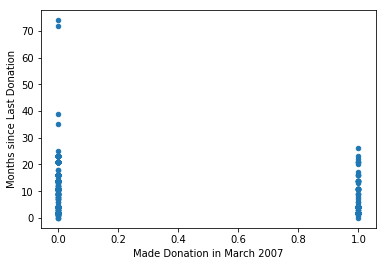

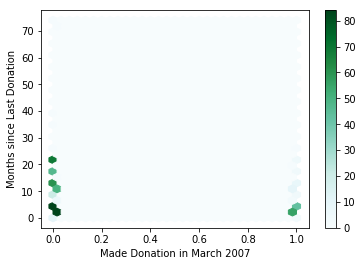

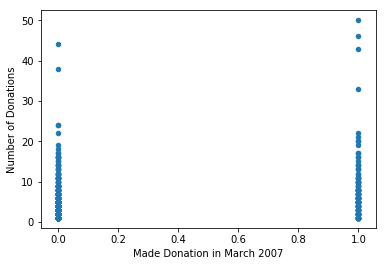

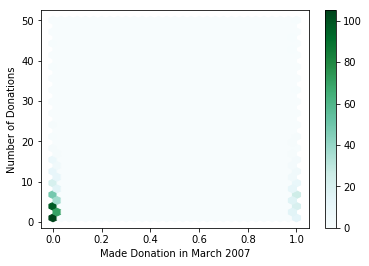

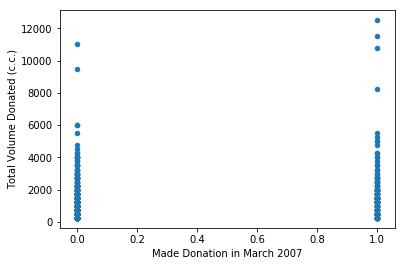

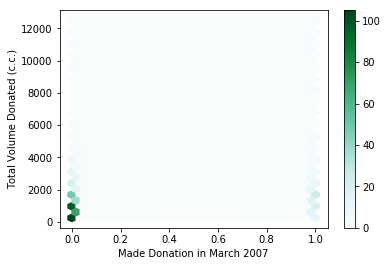

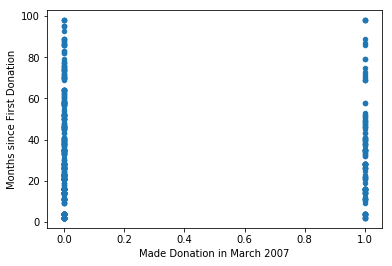

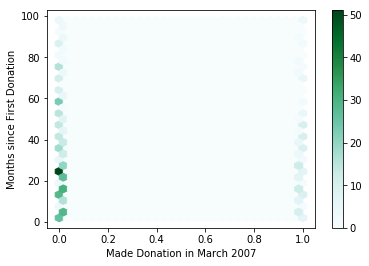

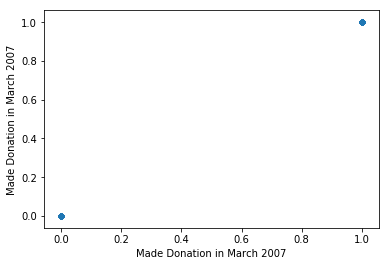

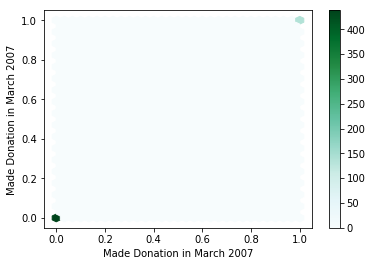

In [204]:
for col in train.columns:
    train.plot.scatter(x="Made Donation in March 2007",y=col)
    train.plot.hexbin(x="Made Donation in March 2007",y=col,gridsize=30,sharex=False)

In [205]:
def bin_last_donation(month):
    bina=""
    if month>20:
        bina="Greater"
    elif month>10:
        bina="Medium"
    elif month<7:
        bina="Lower"
    else:
        bina="Interm"
    return bina

def bin_number_of_donation(num):
    bina=""
    if num<2:
        bina="Novice"
    elif num<4:
        bina="EarlyLearner"
    elif num<7:
        bina="Learner"
    elif num<10:
        bina="Interm"
    elif num<18:
        bina="New"
    elif num<45:
        bina="Seasoned"
    else:
        bina="Seasoned"
    return bina
        
def bin_volume_donated(vol):
    bina=""
    if vol<800:
        bina="Novice"
    elif vol<2000:
        bina="Learner"
    elif vol<4000:
        bina="New"
    elif vol<11000:
        bina="Seasoned"
    else:
        bina="Old"
    return bina
    
train["LastDonation"] = train["Months since Last Donation"].apply(bin_last_donation)
train["Freq"] = train["Number of Donations"].apply(bin_number_of_donation)
train["Volume"] = train["Total Volume Donated (c.c.)"].apply(bin_volume_donated)

In [206]:
y = train["Made Donation in March 2007"]

In [207]:
train.drop("Made Donation in March 2007",axis=1,inplace=True)

In [208]:
from scipy.stats import skew

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
Total Volume Donated (c.c.),3.494201
Number of Donations,3.494201
Months since Last Donation,2.065710
Months since First Donation,0.765706


In [209]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    train[i]= boxcox1p(train[i], boxcox_normmax(train[i]+1))

        
skew_features2 = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2

C:\Users\Sandy\Anaconda3\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Sandy\Anaconda3\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,skew
Number of Donations,0.227730
Total Volume Donated (c.c.),0.217581
Months since Last Donation,0.074844
Months since First Donation,0.016167


In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[train.select_dtypes(exclude="object").columns.tolist()] = scaler.fit_transform(train[train.select_dtypes(exclude="object").columns.tolist()])

In [211]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,0.431264,0.318641,0.310275,0.472005
std,0.182248,0.230744,0.220606,0.257202
min,0.000000,0.000000,0.000000,0.000000
25%,0.218165,0.153146,0.160247,0.303116
50%,0.432430,0.333373,0.327515,0.457745
75%,0.580253,0.487508,0.467811,0.662729
max,1.000000,1.000000,1.000000,1.000000


In [212]:
y.describe()

count    576.000000
mean       0.239583
std        0.427200
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Made Donation in March 2007, dtype: float64

In [213]:
#train = pd.get_dummies(train)

In [214]:
test = pd.read_csv("test.csv")

In [215]:
test.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,374.565000,9.49500,5.935000,1483.750000,35.475000
std,211.138231,7.61907,6.125224,1531.305955,25.111197
min,1.000000,0.00000,1.000000,250.000000,2.000000
25%,198.250000,4.00000,2.000000,500.000000,14.000000
50%,377.500000,7.00000,4.000000,1000.000000,31.000000
75%,537.000000,14.00000,8.000000,2000.000000,52.000000
max,745.000000,40.00000,41.000000,10250.000000,98.000000


In [216]:
test.drop("Unnamed: 0",axis=1,inplace=True)
test["LastDonation"] = test["Months since Last Donation"].apply(bin_last_donation)
test["Freq"] = test["Number of Donations"].apply(bin_number_of_donation)
test["Volume"] = test["Total Volume Donated (c.c.)"].apply(bin_volume_donated)

In [217]:
from scipy.stats import skew

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in test.columns:
    if test[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = test[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
Total Volume Donated (c.c.),2.231187
Number of Donations,2.231187
Months since Last Donation,1.177195
Months since First Donation,0.628984


In [218]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    test[i]= boxcox1p(test[i], boxcox_normmax(test[i]+1))

        
skew_features2 = test[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2

,skew
Number of Donations,0.235558
Total Volume Donated (c.c.),0.218368
Months since Last Donation,0.127786
Months since First Donation,0.001734


In [219]:
#test[test.columns.tolist()] = scaler.fit_transform(test[test.columns.tolist()])
test[test.select_dtypes(exclude="object").columns.tolist()] = scaler.fit_transform(test[test.select_dtypes(exclude="object").columns.tolist()])

In [220]:
#test = pd.get_dummies(test)

In [221]:
CategCols = test.select_dtypes(include="object").columns.tolist()

In [222]:
temp = pd.get_dummies(pd.concat([train,test],keys=[0,1]), columns=CategCols)
train,test = temp.xs(0),temp.xs(1)

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=1)

In [253]:
from sklearn.metrics import log_loss

In [254]:
from sklearn.svm import SVC
svcClassif = SVC()
svcClassif.fit(X_train,y_train)
y_preds = svcClassif.predict(X_test)
#log_loss(y_preds,y_test)

In [255]:
from sklearn.ensemble import RandomForestClassifier
rfClassif = RandomForestClassifier()
rfClassif.fit(X_train,y_train)
y_preds = rfClassif.predict(X_test)
y_pred_probs_rf = rfClassif.predict_proba(X_test)
log_loss(y_preds,y_test)

7.915225101325943

In [256]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostClassif = AdaBoostClassifier()
adaBoostClassif.fit(X_train,y_train)
y_preds = adaBoostClassif.predict(X_test)
y_pred_probs_ab = adaBoostClassif.predict_proba(X_test)
log_loss(y_preds,y_test)

5.5166934100305465

In [259]:
from sklearn.linear_model import LogisticRegression
LRClassif = LogisticRegression()
LRClassif.fit(X_train,y_train)
y_preds = LRClassif.predict(X_test)
y_pred_probs_lr = LRClassif.predict_proba(X_test)
log_loss(y_preds,y_test)

6.476148287524187

In [258]:
from sklearn.ensemble import GradientBoostingClassifier
gbClassif = GradientBoostingClassifier()
gbClassif.fit(X_train,y_train)
y_preds = gbClassif.predict(X_test)
y_pred_probs_gb = gbClassif.predict_proba(X_test)
log_loss(y_preds,y_test)

7.435530979138714

In [295]:
y_cum_preds = (0.2*y_pred_probs_rf) + (0.2*y_pred_probs_ab) + (0.2*y_pred_probs_gb) + (0.4*y_pred_probs_lr)

In [296]:
y_cum_preds = np.where(y_cum_preds > 0.5, 1, 0)

In [297]:
y_cum_preds = np.argmax(y_cum_preds,axis=1)

In [298]:
y_cum_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [299]:
log_loss(y_cum_preds,y_test)

6.236256804351118

In [302]:
y_test_pred_probs_rf = rfClassif.predict_proba(test)
y_test_pred_probs_ab = adaBoostClassif.predict_proba(test)
y_test_pred_probs_gb = gbClassif.predict_proba(test)
y_test_pred_probs_lr = LRClassif.predict_proba(test)

In [303]:
y_true_cum_preds = (0.2*y_test_pred_probs_rf) + (0.2*y_test_pred_probs_ab) + (0.2*y_test_pred_probs_gb) + (0.4*y_test_pred_probs_lr)

In [304]:
len(y_true_cum_preds)

200

In [305]:
y_true_cum_preds = y_true_cum_preds[:,1:]

In [306]:
y_true_cum_preds = y_true_cum_preds.flatten()

In [307]:
testy = pd.read_csv("test.csv")
submission = pd.DataFrame({'Unnamed: 0':testy["Unnamed: 0"],'Made Donation in March 2007':y_true_cum_preds})
#submission = pd.DataFrame({'Unnamed: 0':testy["Unnamed: 0"],'Made Donation in March 2007':y_test_pred_probs_ab})

In [308]:
submission.describe()

,Made Donation in March 2007,Unnamed: 0
count,200.000000,200.000000
mean,0.291699,374.565000
std,0.146235,211.138231
min,0.103652,1.000000
25%,0.178858,198.250000
50%,0.240811,377.500000
75%,0.376076,537.000000
max,0.802726,745.000000


In [309]:
sub = submission[["Unnamed: 0","Made Donation in March 2007"]]

In [310]:
sub.to_csv("submission4.csv", encoding='utf-8', index=False)